# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [1]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Importando bibliotecas

In [14]:
import seaborn as sns
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [15]:
conn = psycopg2.connect(host="localhost",database="carro_BDFINAL", user="postgres", password="101417ha")

## Obtendo dados do database com Pandas

# Relatório 1

### Objetivo: Obter dados sobre a situação do carro do cliente
OS DADOS RELACIONAM NOME DO MOTORISTA, PLACA DO VEÍCULO E NOME DO SENSOR, JUNTO COM O ESTADO DA PEÇA DO RESPECTIVO VEÍCULO ANALISADO PELO SENSOR.

CODIFICAÇÃO PARA OBTENÇÃO DO RESULTADO:

In [123]:
test = pd.read_sql_query("""
                            SELECT NOME, PLACA, NOME_SENSOR,ESTADO_PECA FROM PESSOA
	INNER JOIN VEICULO ON (PESSOA.ID_PESSOA = VEICULO.FK_PESSOA_ID_PESSOA)
	INNER JOIN SENSORES ON (VEICULO.ID_VEICULO = SENSORES.FK_VEICULO_ID_VEICULO)
	INNER JOIN GERAM ON (SENSORES.ID_SENSOR = GERAM.FK_SENSORES_ID_SENSOR);
                            """,conn)

In [124]:
test

,nome,placa,nome_sensor,estado_peca
0,Otávio,BGN-4499,dev24,0
1,Vitorino,DEY-9016,abs36,0
2,Alexandre,EQZ-6152,pol5,0
3,Alexandre,EQZ-6152,cs5,1
4,Renato,XZY-5459,fm29,1
5,Sílvia,JLA-8526,f32,1
6,Patrícia,XAY-8763,pa25,0
7,Cristiana,GHL-1112,fe4,0
8,Alice,HIR-8318,cs8,1
9,Patrícia,XAY-8763,pff25,1


# Relatorio2

### Objetivo: Mostrar quais componentes do carro quebram com mais frequência;
OS DADOS RELACIONAM DESCRICAO DO ERRO IDENTIFICADO PELO SENSOR COM AS FALHAS REGISTRADAS NO SISTÊMA, MOSTRANDO QUAL DOS COMPONENTES DO VEÍCULO APRESENTOU MAIS FALHA.

codigo para obtenção do resultado:

In [79]:
result = pd.read_sql_query("""
                            SELECT DESCRICAO, COUNT(DESCRICAO) AS QUEBRAS FROM SENSORES
	INNER JOIN GERAM ON (SENSORES.ID_SENSOR = GERAM.FK_SENSORES_ID_SENSOR)
	WHERE ESTADO_PECA = 1
	GROUP BY DESCRICAO;
                            """,conn)

In [80]:
result

,descricao,quebras
0,Carga da bateria,2
1,Cinto de segurança,2
2,Faróis,2
3,Faról alto,2
4,Freio de estacionamento,2
5,Fróis de milha,2
6,Nível de combustível,1
7,Portas abertas,4
8,Pressão do fluido do freio,1
9,Pressão do óleo lubrificante,1


Alternativamente podemos aplicar estilos a tabela para melhor formatação usando pandas e seaborn

In [81]:
df = pd.DataFrame(result)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)


,descricao,quebras
0,Carga da bateria,2
1,Cinto de segurança,2
2,Faróis,2
3,Faról alto,2
4,Freio de estacionamento,2
5,Fróis de milha,2
6,Nível de combustível,1
7,Portas abertas,4
8,Pressão do fluido do freio,1
9,Pressão do óleo lubrificante,1


Podemos também utilizar o matplotlib que é instalado por padrão com o seaborn

## Relatório 3

### Objetivo: Obtenção das chamadas de mecânicos registrados no sistema.
OS DADOS RELACIONAM NOME E ESPECIALIZACAO DO MECANICO, CONTABILIZANDO QUANTAS VEZES ELE FOI CHAMADO PARA REALIZAR ALGUM REPARO.

codigo para obtenção do resultado:

In [91]:
result = pd.read_sql_query("""
                            SELECT NOME, ESPECIALIZACAO,COUNT(NOME) AS CHAMADAS FROM PESSOA
	INNER JOIN CONTRATA ON (PESSOA.ID_PESSOA = CONTRATA.FK_PESSOA_ID_MECANICO)
	GROUP BY NOME, ESPECIALIZACAO;
                            """,conn)

In [94]:
result

,nome,especializacao,chamadas
0,Úrsula,Lanterneiro,1
1,Mariano,Elétrica,1
2,Nivaldo,Mecânica,1
3,Rivia,Lanterneiro,1
4,Igor,Borracharia,1
5,José,Borracharia,1
6,Ubiratan,Lanterneiro,2
7,Marcos,Mecânica,1
8,Juliana,Elétrica,4
9,Elias,Elétrica,2


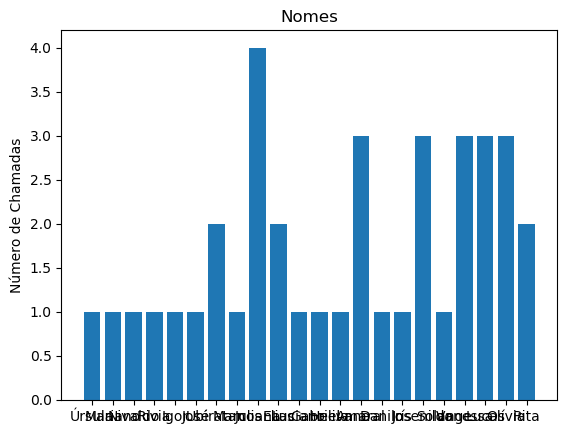

In [98]:
df = pd.DataFrame(result)
cm = sns.light_palette("red", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.nome)
y_pos = np.arange(len(objects))
performance = list(df.chamadas)
 
plt.bar(y_pos, performance, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Número de Chamadas')
plt.title('Nomes')
 
plt.show()

## Relatório 4

### Objetivo: Obter os modelos que mais apresentaram peças com falha registradas no sistema.
OS DADOS RELACIONAM MODELOS REGISTRADOS NOS SISTEMAS COM QUANTIDADES DE FALHAS DE SEUS COMPONENTES, INDICANDO QUAL MODELO TEVE MAIS FALHA.

CODIFICAÇÃO PARA OBTENÇÃO DO RESULTADO:

In [39]:
result = pd.read_sql_query("""
                            SELECT MODELO_VEICULO, ESTADO_PECA,count(*) AS SOMA FROM VEICULO
	INNER JOIN MODELO ON (VEICULO.FK_MODELO_ID_MODELO = MODELO.ID_MODELO)
	INNER JOIN SENSORES ON (VEICULO.ID_VEICULO = SENSORES.FK_VEICULO_ID_VEICULO)
	INNER JOIN GERAM ON (SENSORES.ID_SENSOR = GERAM.FK_SENSORES_ID_SENSOR)
		WHERE ESTADO_PECA = 1
			GROUP BY MODELO_VEICULO, ESTADO_PECA
			ORDER BY MODELO_VEICULO ASC;
                            """,conn)

In [66]:
result

,modelo_veiculo,estado_peca,soma
0,300C,1,1
1,A1,1,2
2,Accelo,1,2
3,Bentley Continental Flying Spur,1,1
4,Camaro,1,1
5,CB Twister,1,2
6,DB9,1,5
7,e5,1,4
8,i3,1,1
9,Marrua,1,2


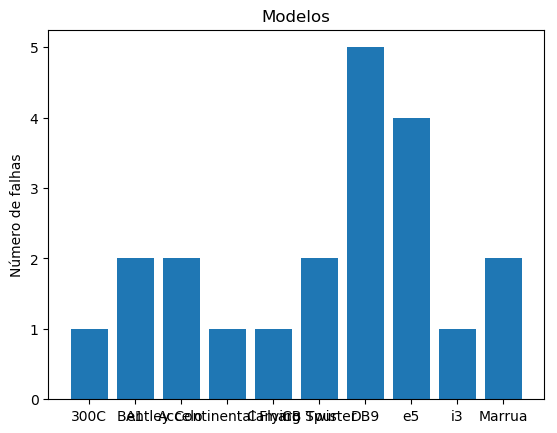

In [70]:
df = pd.DataFrame(result)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.modelo_veiculo)
y_pos = np.arange(len(objects))
performance = list(df.soma)
 
plt.bar(y_pos, performance, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Número de falhas')
plt.title('Modelos')
 
plt.show()

# RELATÓRIO 5

## Objetivo: Definir um perfil dos motoristas de acordo com a idade.
OS DADOS RELACIONAM IDADE DOS MOTORISTAS COM NÚMERO DE FALHAS NOS SEUS VEÍCULOS, PODENDO ASSIM, GERAR A POSSIBILIDADE DE TRAÇAR UM PERFIL DOS MOTORISTAS DE ACORDO COM A IDADE E RESPECTIVAS FALHAS NOS SEUS VEÍCULOS.

In [113]:
result = pd.read_sql_query("""
                            SELECT NOME, date_part('year',age(data_nascimento)), ESTADO_PECA, count(ESTADO_PECA) FROM PESSOA
	iNNER JOIN VEICULO ON (PESSOA.ID_PESSOA = VEICULO.FK_PESSOA_ID_PESSOA)
	INNER JOIN SENSORES ON (VEICULO.ID_VEICULO = SENSORES.FK_VEICULO_ID_VEICULO)
	INNER JOIN GERAM ON (SENSORES.ID_SENSOR = GERAM.FK_SENSORES_ID_SENSOR)
	where ESTADO_PECA = 1
	group by NOME, DATE_PART,ESTADO_PECA;
                            """,conn)

In [114]:
result

,nome,date_part,estado_peca,count
0,Alexandre,38.0,1,2
1,Alice,46.0,1,1
2,Carine,31.0,1,2
3,Cristiana,29.0,1,1
4,Diego,32.0,1,1
5,Fernando,45.0,1,2
6,Franciele,40.0,1,1
7,Iracema,37.0,1,1
8,Patrícia,46.0,1,2
9,Quenia,46.0,1,2


D:\Programas Instalados\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


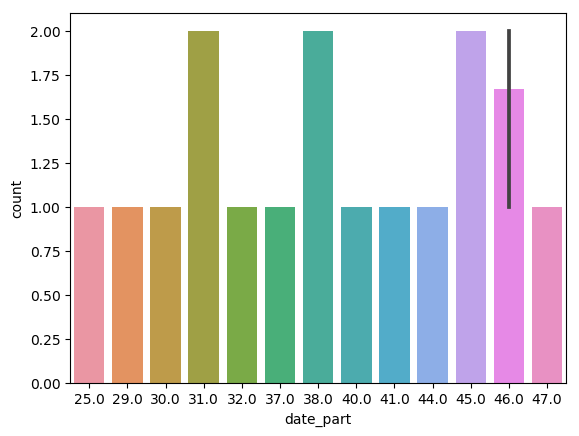

In [122]:
import seaborn as sns
sns.barplot(y="count", x="date_part",data=df,orient="v")

# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>